# Домашнее задание

### по дисциплине «Методы машинного обучения»

Домашнее задание по дисциплине направлено на решение комплексной задачи машинного обучения. Домашнее задание включает выполнение следующих шагов:

- 1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
- 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
- 3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
- 4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
- 5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
- 6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
- 7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
- 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
- 9. Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
- 10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
- 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик.

__Отчет по домашнему заданию__
Отчет по домашнему заданию должен содержать:

- Титульный лист.
- Постановку задачи машинного обучения.
- Описание последовательности действий студента по решению задачи машинного обучения.
- Выводы.

| id | column | type | descryption |
| --- | --- | --- | --- |
|1|fixed acidity|| most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
|2|volatile acidity| |the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste|
|3 |citric acid| |found in small quantities, citric acid can add 'freshness' and flavor to wines|
|4 |residual sugar| |the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet|
|5 |chlorides| |the amount of salt in the wine|
|6 |free sulfur dioxide| |the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine|
|7 |total sulfur dioxide| |amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine|
|8 |density| |the density of water is close to that of water depending on the percent alcohol and sugar content|
|9|pH| |describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale|
|10|sulphates| |a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant|
|11 |alcohol| |the percent alcohol content of the wine|
|12 |quality| |output variable (based on sensory data, score between 0 and 10|




##  Загрузка данных

In [1]:
#Start ML proj
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [2]:
df = pd.read_csv('data/winequality-red.csv', error_bad_lines=False, comment='#')

In [3]:
df.head(4)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6

## Разведочный анализ данных 

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

#### Проверим на пустые значения

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Посмотрим распределение классов целевой переменной

In [6]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

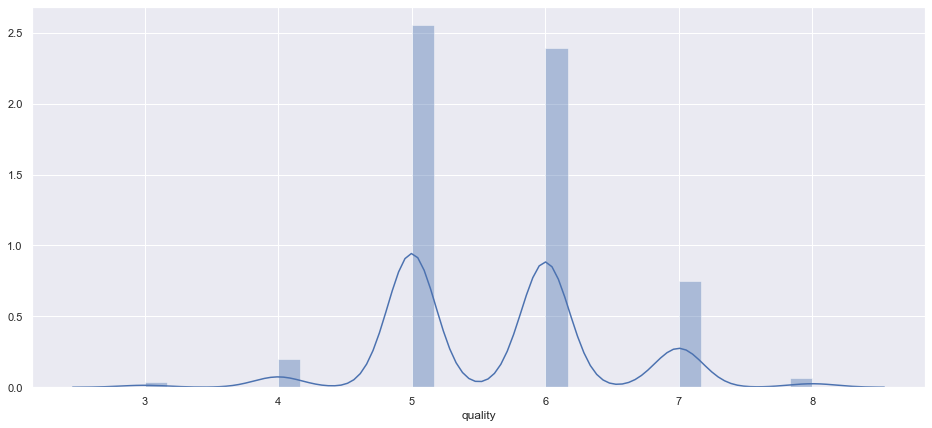

In [7]:
plt.figure(figsize=(16,7))
sns.distplot(df.quality)

##### Построим парсные точечные графики

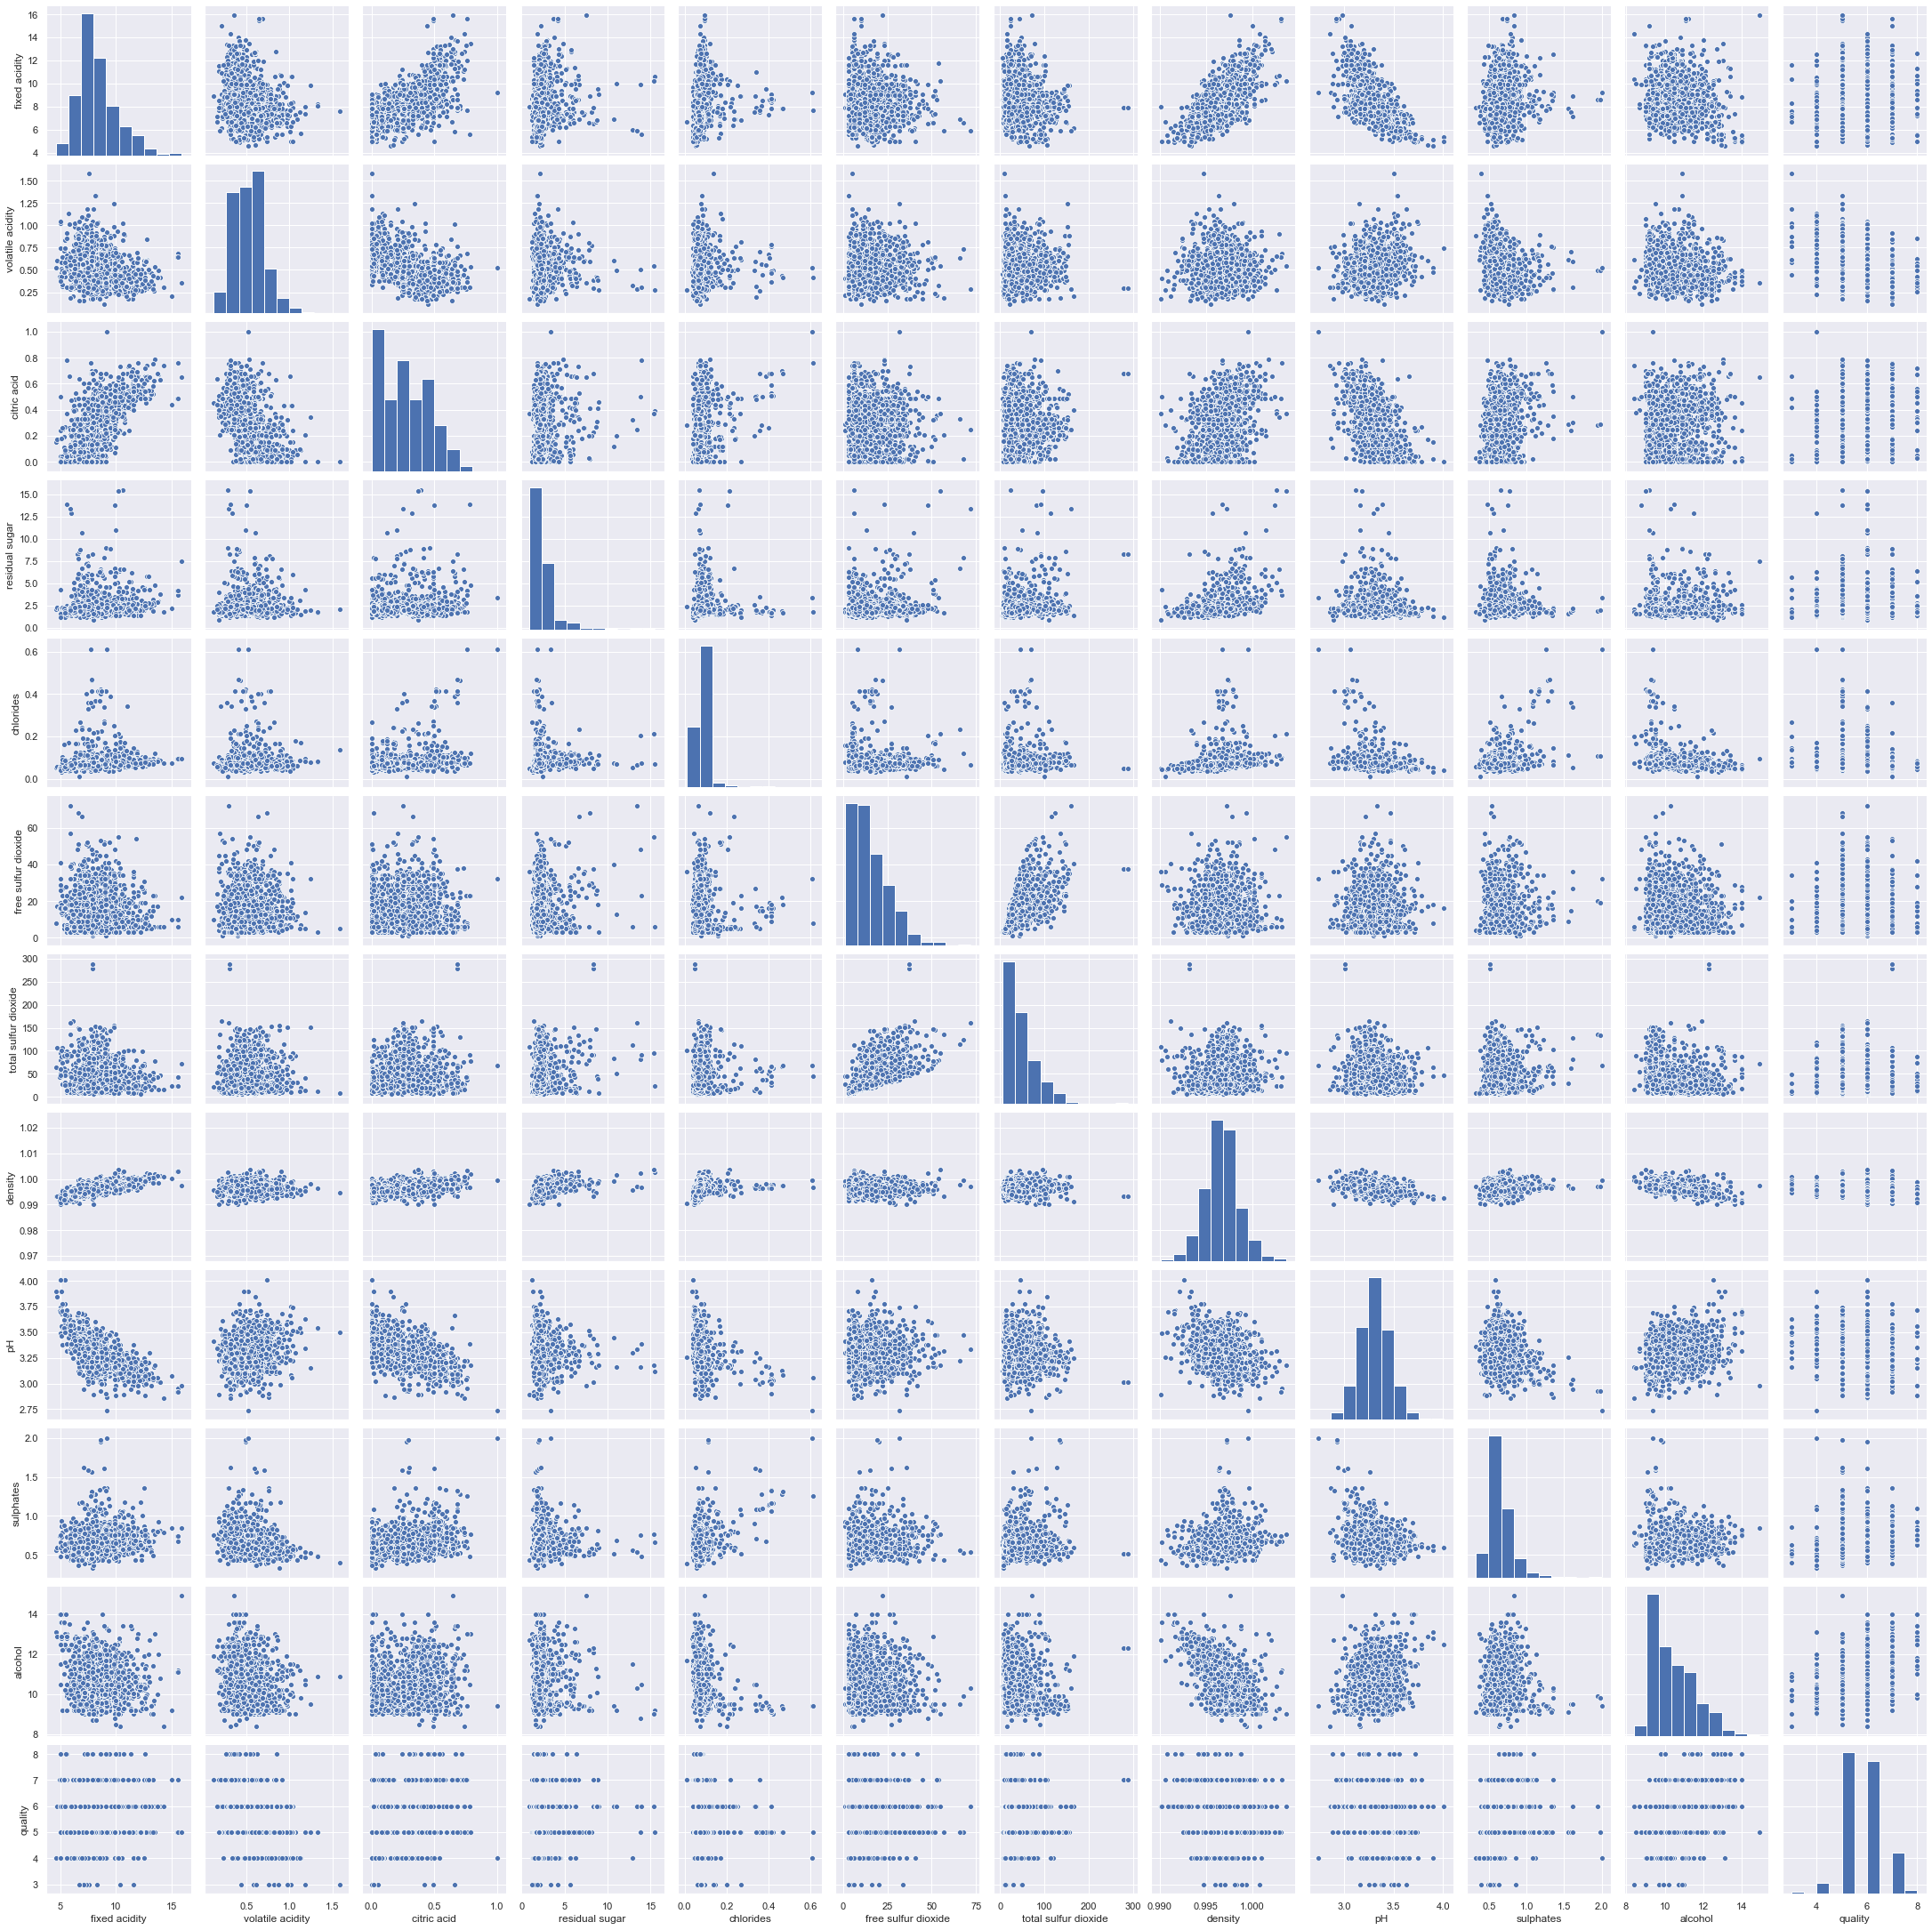

In [38]:
sns.pairplot(df)

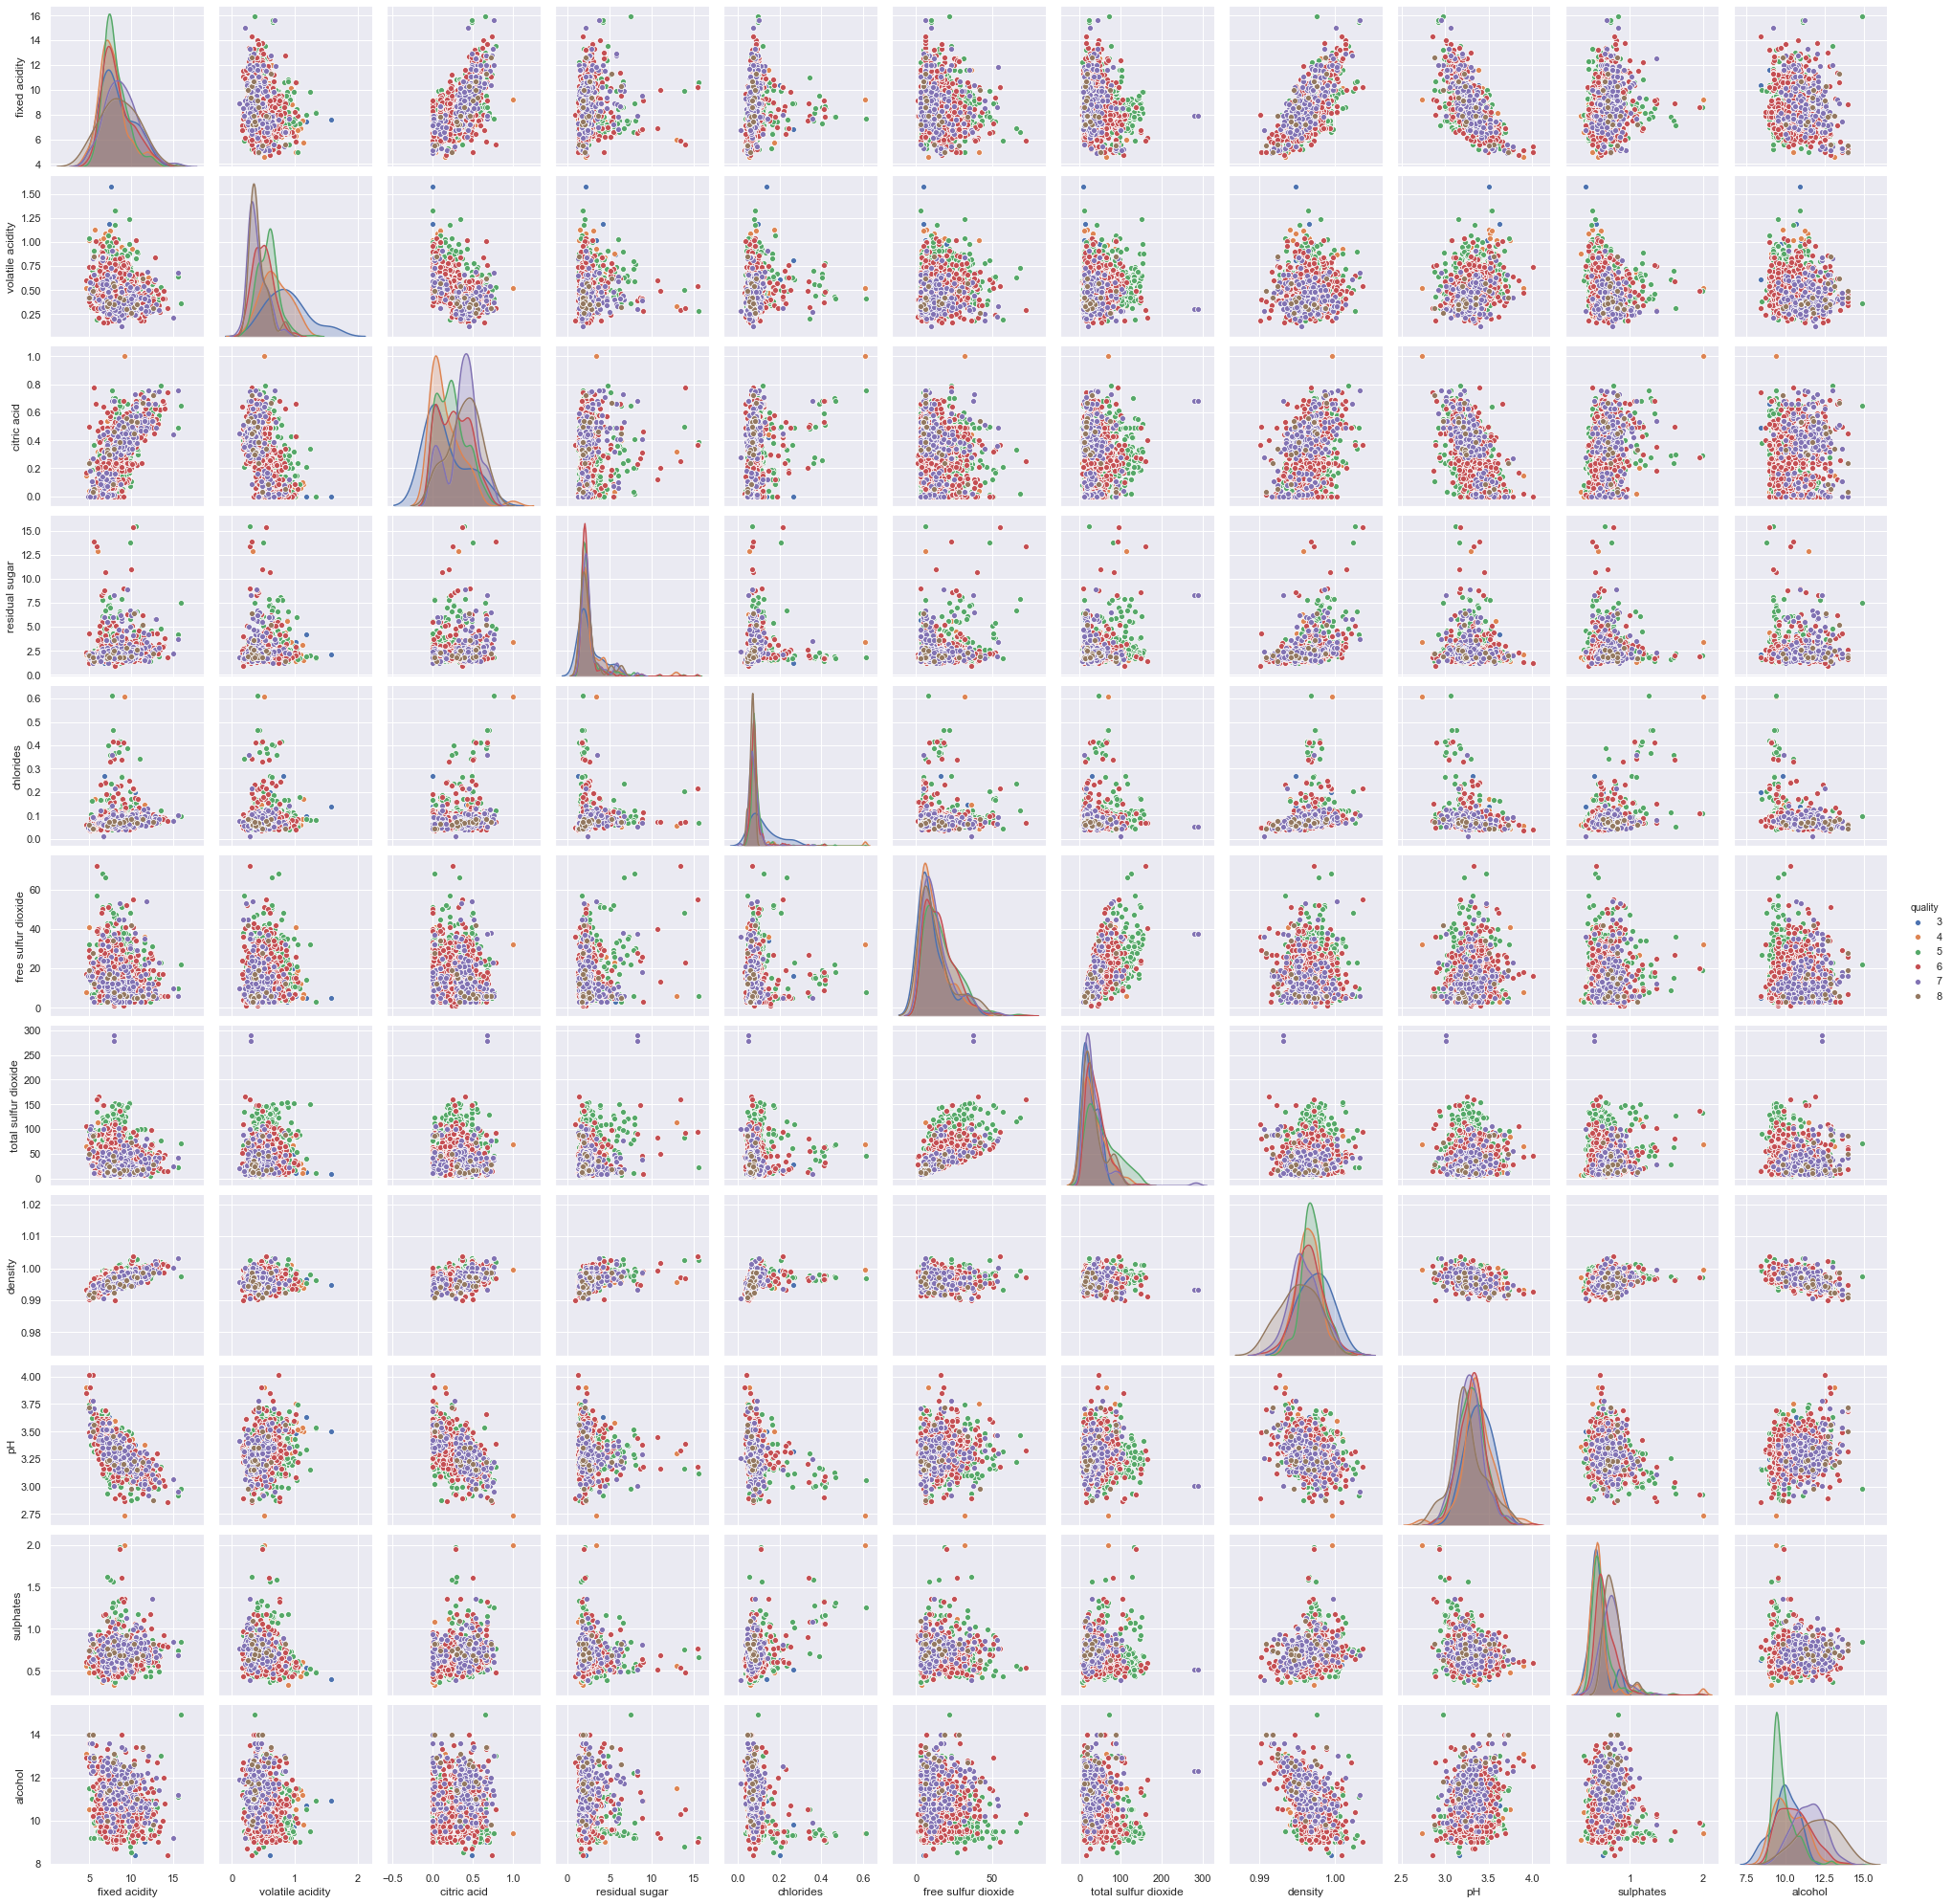

In [41]:
sns.pairplot(df, hue="quality")

Из рисунка видно, что большинство признаков походи на нормальные. Сильно выраженных зависимостей между переменными не наблюдается

##### Разобьем все классы на 3 категории: Хорошее, среднее и плохое вина

In [8]:
category = []
for num in df["quality"].values:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

df['category'] = category
del category

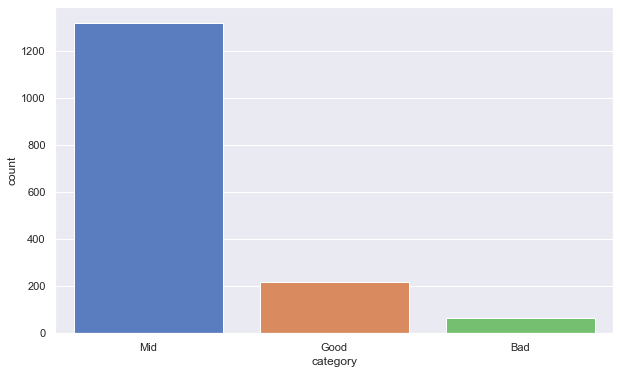

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(df.category, palette="muted")

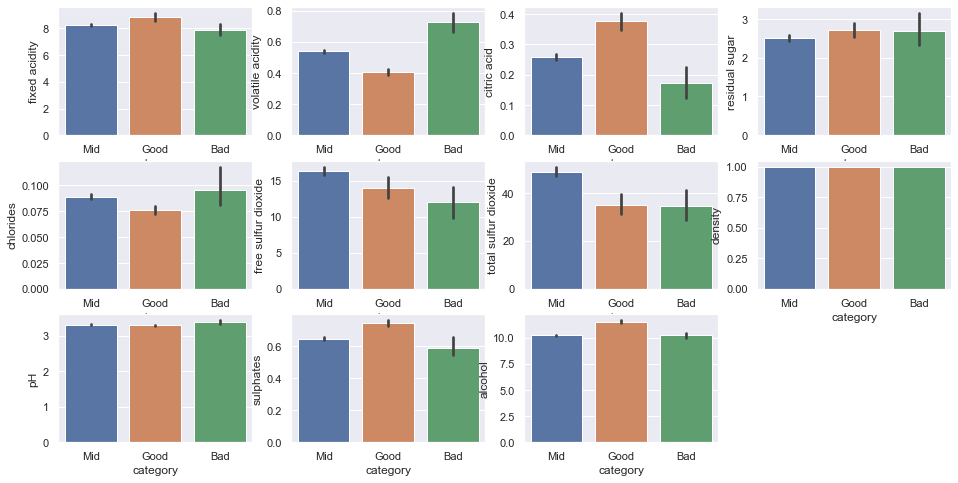

In [76]:
cols = df.drop(columns=['quality', 'category', 'categoryby3']).columns

for i in range(1, 12):
    plt.subplot(3, 4, i)
    sns.barplot(x = 'category', y = cols[i-1], data = df)

На графике с density не видны различия. Посмотрим на этот столбец ближе

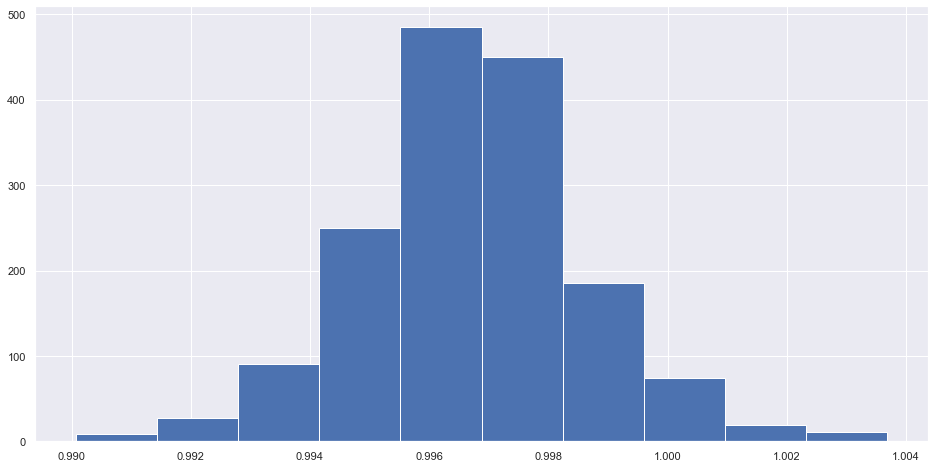

In [79]:
df.density.hist()

Как видно параметр density изменяется в очень маленьких пределах и скорее всего не нужен для дальнейших вычислений

## Выбор метрики

##### Поскольку классы несбалансированны будем использовать для определения качества модели метрики precission, recall, f1_score

In [10]:
from sklearn.metrics import precision_score as PS, recall_score as RC, f1_score as F1

## Проведем корреляционный анализ

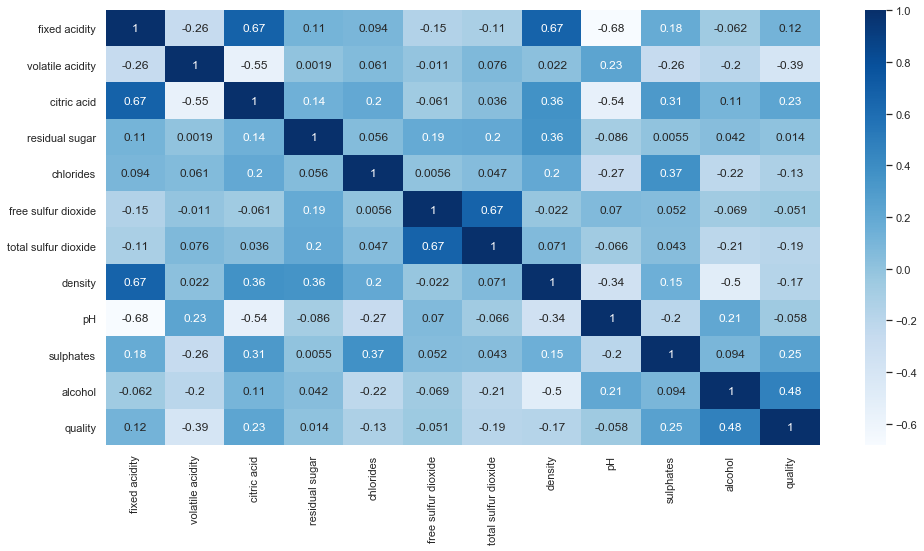

In [11]:
ax = sns.heatmap(df.corr(), annot=True,cmap="Blues")

In [12]:
df.head(1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4               0.7          0.0             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality category  
0      9.4        5      Mid

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['quality', 'category'])
y = df.category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Нормируем данные при помощи StandartScaller

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.044684         -1.512973     0.592500       -0.381246  -0.975920   
1       0.044684          2.765281    -0.630949        2.697609  -0.298913   
2      -0.188693         -0.804472     0.847385       -0.458217   0.229999   
3      -0.713791          0.176529    -0.681926       -0.689131  -0.193131   
4       0.686470          1.811530    -0.070202       -0.458217  -0.171974   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.131394             -1.081515 -1.524952 -0.262722   0.308417   
1            -0.456281              0.233189  1.197398  0.383827  -0.972821   
2            -0.938505             -0.932117 -0.603378 -0.068757  -0.099249   
3            -0.842060             -0.842478 -0.433893 -0.262722  -0.215726   
4            -0.263392             -0.543681  0.201675 -0.392032  -0.215726   

    alcohol  
0  1.945489  
1 -0.485262  
2  0.917094  
3 -1.046204  
4 -0.391771

#### Проверим, что среднее значение близко к 0, а среднеквадратичное отклонение близко к 1

In [15]:
X_train_scaled.describe()

fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.119000e+03      1.119000e+03  1.119000e+03    1.119000e+03   
mean    4.871488e-17      5.873566e-17 -5.863644e-17   -3.166963e-16   
std     1.000447e+00      1.000447e+00  1.000447e+00    1.000447e+00   
min    -2.114051e+00     -2.221474e+00 -1.395605e+00   -1.227931e+00   
25%    -7.137908e-01     -7.499723e-01 -9.368112e-01   -4.582169e-01   
50%    -2.470373e-01     -4.147166e-02 -7.020162e-02   -2.273028e-01   
75%     5.114371e-01      6.125289e-01  7.964080e-01    8.058262e-02   
max     4.245465e+00      5.735533e+00  3.702099e+00    9.932918e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.119000e+03         1.119000e+03          1.119000e+03  1.119000e+03   
mean   1.403901e-17         5.893409e-17          1.226305e-16 -1.720226e-14   
std    1.000447e+00         1.000447e+00          1.000447e+00  1.000447e+00   
min   -1.589458e+00        -1.420728e+00         -1.201034e+00 -3.532287e+00   
25%   -3.623827e-01        -8.420600e-01         -7.528389e-01 -6.033779e-01   
50%   -1.719744e-01        -1.669468e-01         -2.448849e-01  3.219019e-02   
75%    6.074688e-02         5.081664e-01          4.423469e-01  5.989051e-01   
max    1.106211e+01         5.426848e+00          7.254906e+00  3.681410e+00   

                 pH     sulphates       alcohol  
count  1.119000e+03  1.119000e+03  1.119000e+03  
mean   1.895812e-15  6.285311e-17  1.762690e-16  
std    1.000447e+00  1.000447e+00  1.000447e+00  
min   -3.689435e+00 -1.904631e+00 -1.887618e+00  
25%   -6.506519e-01 -6.233925e-01 -8.592233e-01  
50%   -6.875728e-02 -2.157257e-01 -2.982809e-01  
75%    5.777923e-01  4.248937e-01  6.366231e-01  
max    4.521745e+00  7.821135e+00  3.347845e+00

##### Для применения метода классификации OneVsRest бинаризируем значения целевой переменной

In [16]:
from sklearn.preprocessing import label_binarize

y_train_bin = label_binarize(y_train, classes=['Mid','Good', 'Bad'])
y_test_bin = label_binarize(y_test, classes=['Mid','Good', 'Bad'])
n_classes = 3

## Построение baseline

#### Построим модель классификации OneVsRest модели LinearSvc

In [31]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0, max_iter = 10000))
clf.fit(X_train_scaled, y_train_bin)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=10000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None)

Train:
	Precission score:	 0.8431372549019608
	Recall score:		 0.9825897714907508 

	Precission score:	 0.6811594202898551
	Recall score:		 0.30128205128205127 

	Precission score:	 1.0
	Recall score:		 0.022727272727272728 


Test
	Precission score:	 0.8549450549450549
	Recall score:		 0.9725 

	Precission score:	 0.5757575757575758
	Recall score:		 0.3114754098360656 

	Precission score:	 0.0
	Recall score:		 0.0 



C:\Users\als\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


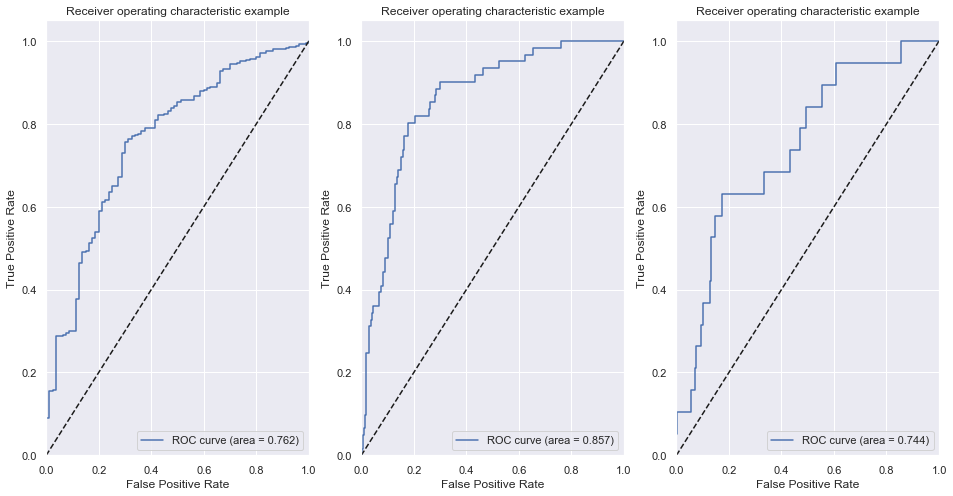

In [51]:
from sklearn.metrics import roc_curve, auc

y_score = clf.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    #plt.figure()
    plt.subplot(1,3, i+1)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    
from sklearn.metrics import recall_score as RS
print('Train:')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_train_bin[:, i], clf.predict(X_train_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_train_bin[:, i], clf.predict(X_train_scaled)[:, i]), '\n')

print('\nTest')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_test_bin[:, i], clf.predict(X_test_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_test_bin[:, i], clf.predict(X_test_scaled)[:, i]), '\n')

#### Построим модель классификации OneVsRest модели GradienrtBoosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

clf_rf = OneVsRestClassifier(GradientBoostingClassifier(n_estimators = 50))
clf_rf.fit(X_train_scaled, y_train_bin);

Train:
	Precission score:	 0.9098196392785571
	Recall score:		 0.9880304678998912 

	Precission score:	 0.9181818181818182
	Recall score:		 0.6474358974358975 

	Precission score:	 1.0
	Recall score:		 0.5909090909090909 


Test
	Precission score:	 0.8761467889908257
	Recall score:		 0.955 

	Precission score:	 0.6046511627906976
	Recall score:		 0.4262295081967213 

	Precission score:	 0.2
	Recall score:		 0.10526315789473684 



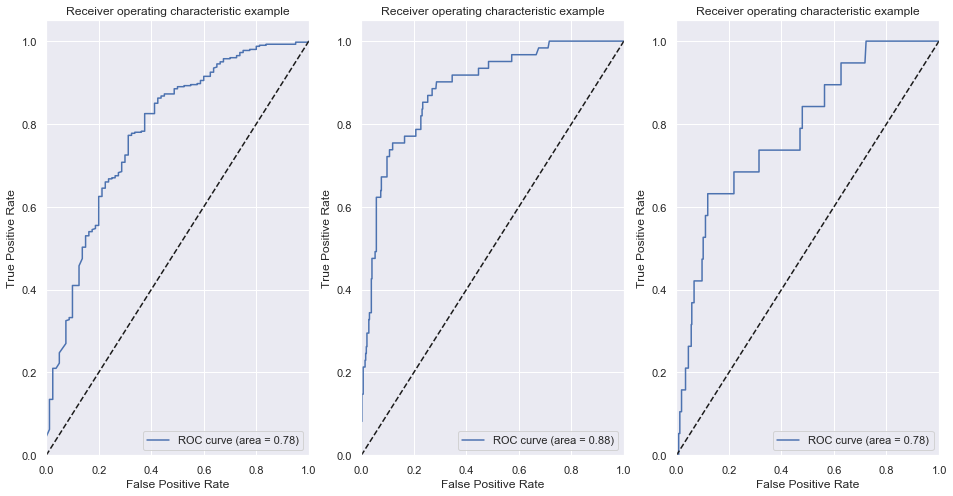

In [53]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import recall_score as RS
print('Train:')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_train_bin[:, i], clf_rf.predict(X_train_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_train_bin[:, i], clf_rf.predict(X_train_scaled)[:, i]), '\n')

print('\nTest')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_test_bin[:, i], clf_rf.predict(X_test_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_test_bin[:, i], clf_rf.predict(X_test_scaled)[:, i]), '\n')

y_score = clf_rf.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    #plt.figure()
    plt.subplot(1,3, i+1)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

## Подбор гиперпараметров

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

params = {'estimator__max_iter' : np.arange(6000, 7500, 200)}

gr_ls = GridSearchCV(estimator=OneVsRestClassifier(LinearSVC()), param_grid=params, cv = 3)
gr_ls.fit(X_train_scaled, y_train_bin)

C:\Users\als\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\als\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                               class_weight=None,
                                                               dual=True,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               loss='squared_hinge',
                                                               max_iter=1000,
                                                               multi_class='ovr',
                                                               penalty='l2',
                                                               random_state=None,
                                                               tol=0.0001,
                                                               verbose=0),
                 

In [64]:
gr_ls.best_params_

{'estimator__max_iter': 6000}

Train:
	Precission score:	 0.8431372549019608
	Recall score:		 0.9825897714907508 

	Precission score:	 0.6811594202898551
	Recall score:		 0.30128205128205127 

	Precission score:	 1.0
	Recall score:		 0.022727272727272728 


Test
	Precission score:	 0.8549450549450549
	Recall score:		 0.9725 

	Precission score:	 0.5757575757575758
	Recall score:		 0.3114754098360656 

	Precission score:	 0.0
	Recall score:		 0.0 



C:\Users\als\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


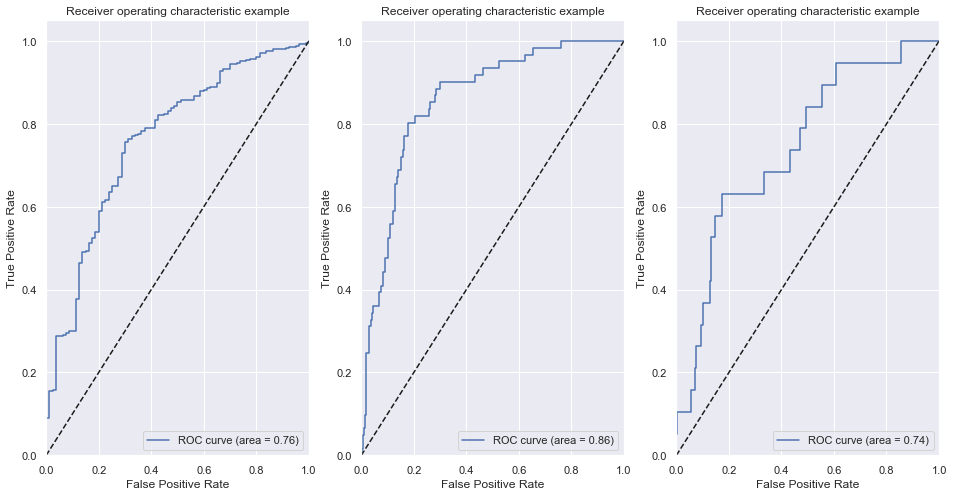

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score as RS

clf1 = gr_ls.best_estimator_

print('Train:')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_train_bin[:, i], clf1.predict(X_train_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_train_bin[:, i], clf1.predict(X_train_scaled)[:, i]), '\n')

print('\nTest')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_test_bin[:, i], clf1.predict(X_test_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_test_bin[:, i], clf1.predict(X_test_scaled)[:, i]), '\n')

y_score = clf1.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    #plt.figure()
    plt.subplot(1,3, i+1)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

### Using GridSearchCV GradientBoostingClassifier

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import GradientBoostingClassifier

params = {'estimator__n_estimators' : np.arange(20, 200, 10)}

clf_rf = OneVsRestClassifier(GradientBoostingClassifier())
gr = GridSearchCV(estimator=clf_rf, param_grid=params, cv = 3)
gr.fit(X_train_scaled, y_train_bin);

In [67]:
gr.best_params_

{'estimator__n_estimators': 70}

Train:
	Precission score:	 0.9276985743380856
	Recall score:		 0.9912948857453754 

	Precission score:	 0.926829268292683
	Recall score:		 0.7307692307692307 

	Precission score:	 1.0
	Recall score:		 0.6590909090909091 


Test
	Precission score:	 0.8811188811188811
	Recall score:		 0.945 

	Precission score:	 0.6122448979591837
	Recall score:		 0.4918032786885246 

	Precission score:	 0.375
	Recall score:		 0.15789473684210525 



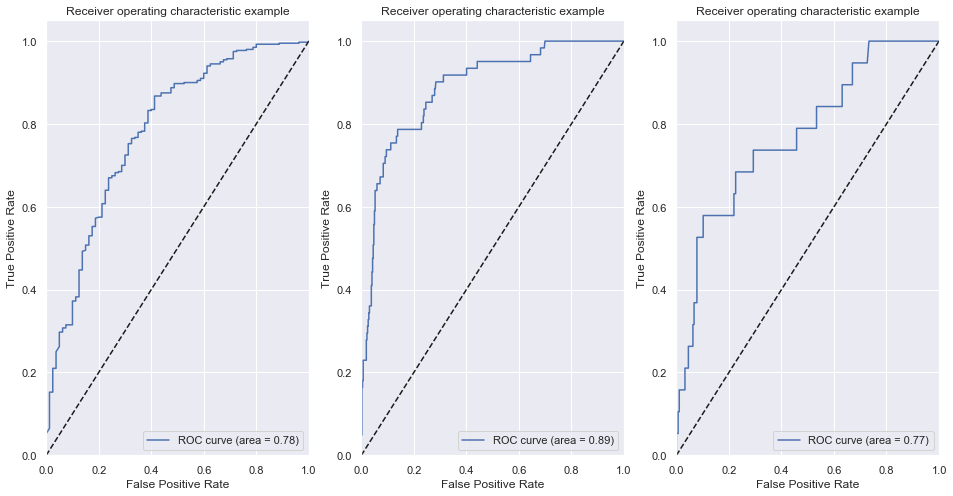

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score as RS

clf1 = gr.best_estimator_

print('Train:')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_train_bin[:, i], clf1.predict(X_train_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_train_bin[:, i], clf1.predict(X_train_scaled)[:, i]), '\n')

print('\nTest')
for i in range(0, 3):
    print('\tPrecission score:\t', PS(y_test_bin[:, i], clf1.predict(X_test_scaled)[:, i]))
    print('\tRecall score:\t\t', RS(y_test_bin[:, i], clf1.predict(X_test_scaled)[:, i]), '\n')

y_score = clf1.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    #plt.figure()
    plt.subplot(1,3, i+1)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

После подбора параметров улучшились показатели качества модели

__Вывод:__ Таким образом мы рассмотрели и применили на практике ансамблевые модел